In [1221]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import re
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.model_selection import GridSearchCV

In [1222]:
# Load files
data_path = 'PRIVATE'
trainm = pd.read_csv(data_path + 'Train.csv')
testm = pd.read_csv(data_path + 'Test.csv')
sample_submissionm = pd.read_csv(data_path + 'SampleSubmission.csv')
var_descm = pd.read_csv(data_path + 'VariableDescription.csv')

train = trainm.copy()
test = testm.copy()
sample_submission = sample_submissionm.copy()
var_desc = var_descm.copy()

In [1223]:
# 1. EXPLORE THE DATASET
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [1224]:
test.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre
0,ID_F9XXEXN2ADR2,Jamui,Khaira,20,13,TractorPlough,2022-07-24,4,Manual_PuddledLine,2022-07-03,...,Broadcasting,hand,2022-12-02,500.0,2022-12-28,hand,22,10,plowed_in_soil,0.272727
1,ID_SO3VW2X4QO93,Jamui,Khaira,25,25,TractorPlough,2022-07-24,5,Manual_PuddledRandom,2022-07-08,...,Broadcasting,hand,2022-11-12,150.0,2022-12-20,machine,28,10,plowed_in_soil,0.227273
2,ID_UKUQ7JM8E894,Nalanda,Rajgir,30,30,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-07,5,Manual_PuddledRandom,2022-06-24,...,Broadcasting,hand,2022-11-24,1200.0,2022-12-05,machine,28,10,plowed_in_soil,0.281250
3,ID_QUISMWEZR2H4,Vaishali,Mahua,15,10,WetTillagePuddling TractorPlough BullockPlough...,2022-07-04,5,Manual_PuddledRandom,2022-06-20,...,SoilApplied,hand,2022-10-15,300.0,2022-10-25,hand,30,10,plowed_in_soil,0.136364
4,ID_25JGI455VKCZ,Nalanda,Rajgir,30,10,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-21,3,Manual_PuddledRandom,2022-06-24,...,Broadcasting,machine,2022-11-20,NaN,2022-11-20,machine,26,40,plowed_in_soil,0.312500


In [1225]:
sample_submission.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,0
1,ID_SO3VW2X4QO93,0
2,ID_UKUQ7JM8E894,0
3,ID_QUISMWEZR2H4,0
4,ID_25JGI455VKCZ,0


In [1226]:
train.describe()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,NoFertilizerAppln,...,BasalUrea,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
count,3870.000000,3870.000000,3870.000000,3581.000000,3677.000000,2988.000000,3632.000000,1453.000000,1196.000000,3870.000000,...,2166.000000,3314.000000,3314.000000,1176.000000,1170.000000,3618.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,28.527907,24.727132,4.488372,2.706507,8.017677,379.726908,3.247522,29.731590,57.445652,2.184496,...,13.351801,11.513881,29.200362,7.375000,58.764957,536.622443,26.517829,11.767442,0.292826,594.269251
std,30.454218,27.994802,1.133044,7.624397,42.612470,419.724782,2.207276,122.680882,328.251615,0.634632,...,9.701597,8.715856,12.139109,5.932502,11.356588,1138.613827,3.192873,7.064864,0.206918,651.916953
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000,0.045455,4.000000
25%,12.000000,10.000000,4.000000,2.000000,2.000000,150.000000,2.000000,1.000000,1.000000,2.000000,...,7.000000,6.000000,23.000000,4.000000,58.000000,150.000000,25.000000,10.000000,0.156250,300.000000
50%,20.000000,20.000000,4.000000,2.000000,4.000000,250.000000,3.000000,3.000000,2.000000,2.000000,...,10.000000,10.000000,28.000000,6.000000,60.000000,400.000000,26.000000,10.000000,0.227273,425.000000
75%,35.000000,30.000000,5.000000,3.000000,6.000000,450.000000,4.000000,4.000000,5.000000,3.000000,...,16.000000,15.000000,36.000000,10.000000,65.000000,700.000000,30.000000,10.000000,0.370370,740.000000
max,800.000000,800.000000,8.000000,442.000000,2000.000000,6000.000000,15.000000,1400.000000,4000.000000,4.000000,...,90.000000,90.000000,332.000000,67.000000,97.000000,60000.000000,30.000000,40.000000,2.187500,16800.000000


In [1227]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

In [1228]:
test.describe()


,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,NoFertilizerAppln,BasalDAP,BasalUrea,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre
count,1290.000000,1290.000000,1290.000000,1187.000000,1213.000000,973.000000,1211.000000,495.000000,422.000000,1290.000000,1099.000000,719.000000,1113.000000,1112.000000,415.000000,408.000000,1217.000000,1290.000000,1290.000000,1290.000000
mean,29.199225,25.537984,4.434109,2.598147,8.352020,405.018499,3.267547,28.292929,76.753555,2.213178,11.831665,13.187761,11.919137,28.454137,7.498795,58.948529,617.937551,26.360465,11.558140,0.299906
std,24.640405,23.290966,1.139903,2.055166,37.107536,440.257325,2.240741,116.253149,373.108482,0.632931,9.242723,10.251004,9.531127,10.436368,6.265030,11.270618,1535.888481,3.511632,6.659637,0.212641
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,10.000000,0.045455
25%,12.000000,10.000000,4.000000,2.000000,2.000000,150.000000,2.000000,1.000000,1.000000,2.000000,6.000000,7.000000,6.000000,23.000000,4.000000,60.000000,150.000000,25.000000,10.000000,0.181818
50%,21.000000,20.000000,4.000000,2.000000,4.000000,300.000000,3.000000,3.000000,2.000000,2.000000,10.000000,10.000000,10.000000,28.000000,6.000000,60.000000,400.000000,26.000000,10.000000,0.227273
75%,40.000000,30.000000,5.000000,3.000000,6.000000,500.000000,4.000000,4.000000,5.000000,3.000000,15.000000,15.500000,15.000000,35.000000,10.000000,65.000000,720.000000,30.000000,10.000000,0.370370
max,200.000000,200.000000,8.000000,20.000000,1000.000000,3000.000000,20.000000,900.000000,3000.000000,4.000000,100.000000,120.000000,120.000000,65.000000,50.000000,85.000000,40080.000000,30.000000,40.000000,2.045455


In [1229]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

In [1230]:
# Convert columns with dates into numerical values

for col in train.columns:
    if 'Date' in col or 'date' in col:
        train[col] = pd.to_datetime(train[col])
        train[col] = train[col].dt.dayofyear

for col in test.columns:
    if 'Date' in col or 'date' in col:
        test[col] = pd.to_datetime(test[col])
        test[col] = test[col].dt.dayofyear

train['SeedingSowingTransplanting'] = pd.to_datetime(train['SeedingSowingTransplanting'])
train['SeedingSowingTransplanting'] = train['SeedingSowingTransplanting'].dt.dayofyear

test['SeedingSowingTransplanting'] = pd.to_datetime(test['SeedingSowingTransplanting'])
test['SeedingSowingTransplanting'] = test['SeedingSowingTransplanting'].dt.dayofyear

train.head()


,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,201,5,Manual_PuddledRandom,178.0,...,machine,320,NaN,320,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,199,5,Manual_PuddledRandom,171.0,...,hand,329,3.0,358,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,181,6,Manual_PuddledRandom,171.0,...,hand,346,480.0,11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,167,6,Manual_PuddledRandom,168.0,...,hand,336,240.0,363,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,200,4,Manual_PuddledRandom,172.0,...,machine,334,NaN,336,machine,24,40,plowed_in_soil,0.468750,550


In [1231]:
# Categorical columns : Encoding multiple selection to complexity 
# The columns are: LandPreparationMethod, NursDetFactor, TransDetFactor, OrgFertilizers, CropbasalFerts, FirstTopDressFert

#transform into a string first

#create a for loop to do the actions below for all the columns

#arraynum = ['LandPreparationMethod', 'NursDetFactor', 'TransDetFactor', 'OrgFertilizers', 'CropbasalFerts', 'FirstTopDressFert']


arraycatmulti = ['LandPreparationMethod', 'NursDetFactor', 'TransDetFactor', 'OrgFertilizers', 'CropbasalFerts', 'FirstTopDressFert']

train_cat_complex = train.copy()

for j in arraycatmulti:
    for i in range(len(train_cat_complex)):
        line = train_cat_complex.loc[i,j]
        # if the content is a NaN
        if type(line) == str:
             train_cat_complex.loc[i,j] = float(len(line.split()))
        else:
            train_cat_complex.loc[i,j] = np.nan      

train_cat_complex.head()

# Do the same for the test dataset

test_cat_complex = test.copy()

for j in arraycatmulti:
    for i in range(len(test_cat_complex)):
        line = test_cat_complex.loc[i,j]
        # if the content is a NaN
        if type(line) == str:
             test_cat_complex.loc[i,j] = float(len(line.split()))
        else:
            test_cat_complex.loc[i,j] = np.nan

train_cat_complex = train_cat_complex[arraycatmulti]
test_cat_complex = test_cat_complex[arraycatmulti]

# Split the information in the column LandPreparationMethod into and calculate the amount of options selected


#Check the type of data in the column


#= train['LandPreparationMethod'].str.split(' ')

#take the length
#train['LandPreparationMethod'] = train['LandPreparationMethod'].str.len()
#train['LandPreparationMethod'].head()


test_cat_complex.head()



,LandPreparationMethod,NursDetFactor,TransDetFactor,OrgFertilizers,CropbasalFerts,FirstTopDressFert
0,1.0,3.0,4.0,1.0,1.0,1.0
1,1.0,3.0,4.0,NaN,1.0,1.0
2,3.0,4.0,4.0,1.0,2.0,1.0
3,4.0,4.0,4.0,1.0,1.0,1.0
4,3.0,2.0,3.0,NaN,2.0,1.0


In [1232]:
# Separate caterogiocal and numerical columns
train_cat = train.select_dtypes(include=['object'])
train_num = train.select_dtypes(exclude=['object'])

test_cat = test.select_dtypes(include=['object'])
test_num = test.select_dtypes(exclude=['object'])


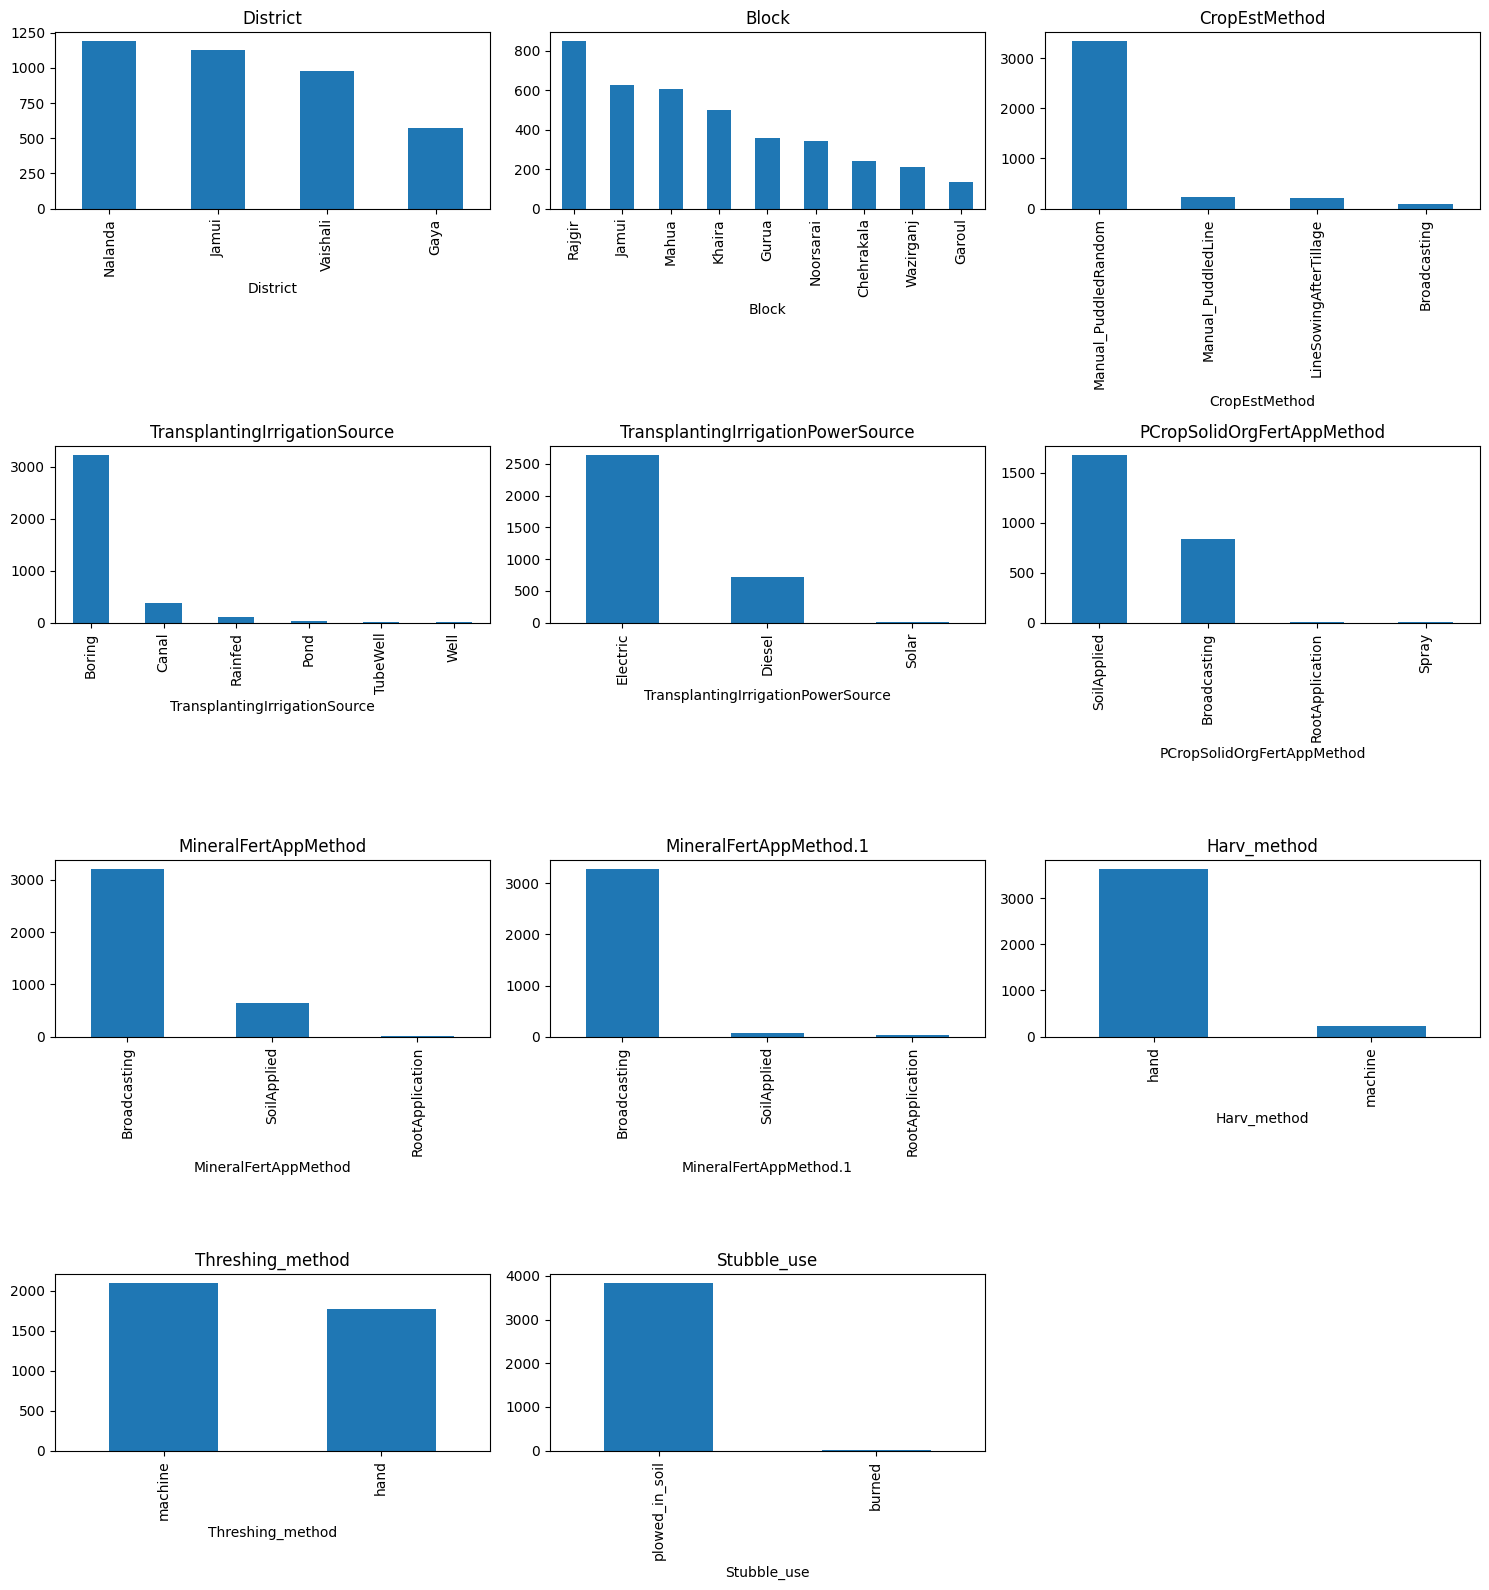

In [1233]:
# Visualize categorical variables with bar plots

#Drop ID
train_cat = train_cat.drop('ID', axis=1)

#Temporarely isolate the arraycatmulti columns and remove them from original train_cat
train_cat = train_cat.drop(arraycatmulti, axis=1)

# Define the layout of your subplots
n_cols = 3  # number of columns per row in the subplot grid
n_rows = (len(train_cat.columns) + n_cols - 1) // n_cols  # calculate the number of rows needed

# Create a large figure to hold all the subplots
plt.figure(figsize=(15, 4 * n_rows))  # Adjust the size as needed

# Create a box plot for each column
for i, col in enumerate(train_cat.columns):
    plt.subplot(n_rows, n_cols, i + 1)  # add a new subplot iteratively
    train_cat[col].value_counts().plot(kind='bar')
    plt.title(col)

# Adjust layout and show the plot
plt.tight_layout()
#plt.show()

# Do the same with the test dataset






,Harv_method,Threshing_method,Stubble_use
0,0,0,1
1,0,1,1
2,0,1,1
3,0,0,1
4,1,1,1


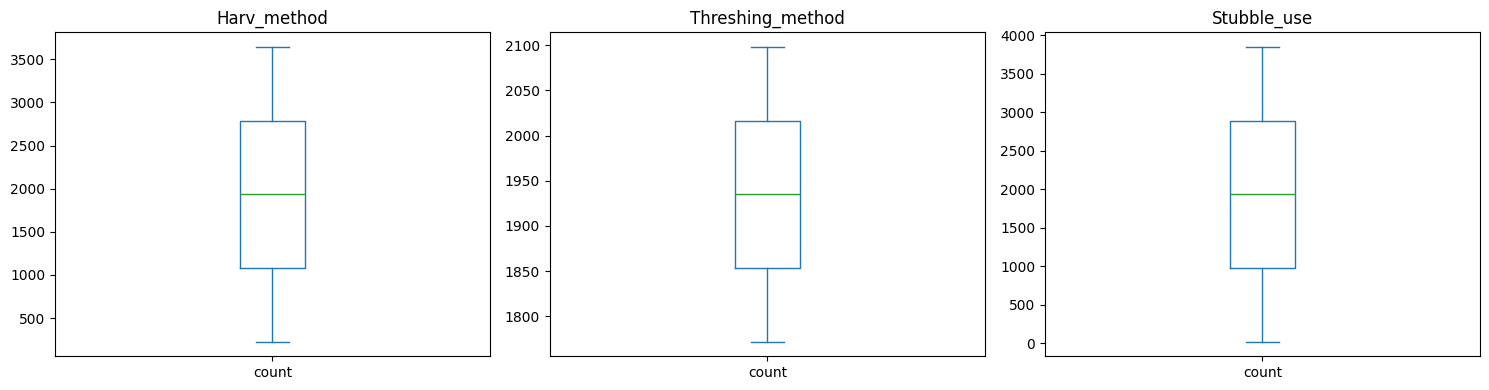

In [1234]:
# Categorical variables : Binary


# Seperate values between 0 and 1
columnbinary = ['Harv_method', 'Threshing_method', 'Stubble_use']

#Create copy of traincat
train_cat_bin = train_cat.copy()

#Drop columnbinary in train_cat
train_cat = train_cat.drop(columnbinary, axis=1)

#In Harv_method, replace machine by 1 and hand by 0, in float format
train_cat_bin['Harv_method'] = train_cat_bin['Harv_method'].replace('machine', 1)
train_cat_bin['Harv_method'] = train_cat_bin['Harv_method'].replace('hand', 0)

#In Threshing_method, replace machine by 1 and hand by 0
train_cat_bin['Threshing_method'] = train_cat_bin['Threshing_method'].replace('machine', 1)
train_cat_bin['Threshing_method'] = train_cat_bin['Threshing_method'].replace('hand', 0)

#In Stubble_use, replace plowed_in_soil by 1 and burned by 0 in float
train_cat_bin['Stubble_use'] = train_cat_bin['Stubble_use'].replace('plowed_in_soil', 1)
train_cat_bin['Stubble_use'] = train_cat_bin['Stubble_use'].replace('burned', 0)


#Do the same with test set
test_cat_bin = test_cat.copy()

#In Harv_method, replace machine by 1 and hand by 0, in float format
test_cat_bin['Harv_method'] = test_cat_bin['Harv_method'].replace('machine', 1)
test_cat_bin['Harv_method'] = test_cat_bin['Harv_method'].replace('hand', 0)

#In Threshing_method, replace machine by 1 and hand by 0
test_cat_bin['Threshing_method'] = test_cat_bin['Threshing_method'].replace('machine', 1)
test_cat_bin['Threshing_method'] = test_cat_bin['Threshing_method'].replace('hand', 0)

#In Stubble_use, replace plowed_in_soil by 1 and burned by 0 in float
test_cat_bin['Stubble_use'] = test_cat_bin['Stubble_use'].replace('plowed_in_soil', 1)
test_cat_bin['Stubble_use'] = test_cat_bin['Stubble_use'].replace('burned', 0)

#KEep only those columns
train_cat_bin = train_cat_bin[columnbinary]
test_cat_bin = test_cat_bin[columnbinary]

# boxplot the results of the changes
# Define the layout of your subplots
n_cols = 3  # number of columns per row in the subplot grid
n_rows = (len(columnbinary) + n_cols - 1) // n_cols  # calculate the number of rows needed

# Create a large figure to hold all the subplots
plt.figure(figsize=(15, 4 * n_rows))  # Adjust the size as needed

# Create a box plot for each column
for i, col in enumerate(columnbinary):
    plt.subplot(n_rows, n_cols, i + 1)  # add a new subplot iteratively
    train_cat_bin[col].value_counts().plot(kind='box')
    plt.title(col)

# Adjust layout and show the plot
plt.tight_layout()
#plt.show()

test_cat_bin.head()

In [1235]:
train_num.head()
test_cat_bin.head()


,Harv_method,Threshing_method,Stubble_use
0,0,0,1
1,0,1,1
2,0,1,1
3,0,0,1
4,1,1,1


In [1236]:
# Categorical variables : Encoding categorical variables with multiple answers

train_cat_multiple = train_cat.copy()
#Should be the left oevre columns in train_cat, in case
columnmultiple = ['District', 'Block', 'CropEstMethod', 'TransplantingIrrigationSource', 'TransplantingIrrigationPowerSource', 'PCropSolidOrgFertAppMethod', 'MineralFertAppMethod', 'MineralFertAppMethod.1']

#Countfrequency encoder on train_cat.columns
count_enc = CountFrequencyEncoder(encoding_method='frequency',
                                  variables=columnmultiple, missing_values='ignore')

count_enc.fit(train_cat_multiple)

train_cat_multiple = count_enc.transform(train_cat_multiple)

train_cat_multiple = train_cat_multiple[columnmultiple]

#DO THE SAME WITH TEST
test_cat_multiple = test_cat.copy()

count_enc = CountFrequencyEncoder(encoding_method='frequency',
                                    variables=columnmultiple, missing_values='ignore')

count_enc.fit(test_cat_multiple[columnmultiple])

test_cat_multiple = count_enc.transform(test_cat_multiple[columnmultiple])

test_cat_multiple.head()

#Frequency encoding


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/feature_engine/encoding/base_encoder.py:255: UserWarning: During the encoding, NaN values were introduced in the feature(s) TransplantingIrrigationSource, TransplantingIrrigationPowerSource, PCropSolidOrgFertAppMethod, MineralFertAppMethod.1.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/feature_engine/encoding/base_encoder.py:255: UserWarning: During the encoding, NaN values were introduced in the feature(s) TransplantingIrrigationSource, TransplantingIrrigationPowerSource, PCropSolidOrgFertAppMethod, MineralFertAppMethod.1.
  warnings.warn(


,District,Block,CropEstMethod,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,PCropSolidOrgFertAppMethod,MineralFertAppMethod,MineralFertAppMethod.1
0,0.297674,0.131008,0.066667,0.860129,0.211796,0.672769,0.828682,0.979021
1,0.297674,0.131008,0.853488,0.097267,NaN,NaN,0.828682,0.979021
2,0.313178,0.210078,0.853488,0.097267,NaN,0.320366,0.828682,0.979021
3,0.251938,0.159690,0.853488,0.860129,0.211796,0.672769,0.168217,0.016608
4,0.313178,0.210078,0.853488,0.860129,0.788204,NaN,0.828682,0.979021


In [1237]:
#Concatenate columns but avoid duplicate
train_cat_num= pd.concat([train_cat_multiple, train_cat_complex, train_cat_bin], axis=1)
test_cat_num= pd.concat([test_cat_multiple, test_cat_complex, test_cat_bin], axis=1)


print(train_cat_num.shape)
print(test_cat_num.shape)

test_cat_num.head()


(3870, 17)
(1290, 17)


,District,Block,CropEstMethod,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,PCropSolidOrgFertAppMethod,MineralFertAppMethod,MineralFertAppMethod.1,LandPreparationMethod,NursDetFactor,TransDetFactor,OrgFertilizers,CropbasalFerts,FirstTopDressFert,Harv_method,Threshing_method,Stubble_use
0,0.297674,0.131008,0.066667,0.860129,0.211796,0.672769,0.828682,0.979021,1.0,3.0,4.0,1.0,1.0,1.0,0,0,1
1,0.297674,0.131008,0.853488,0.097267,NaN,NaN,0.828682,0.979021,1.0,3.0,4.0,NaN,1.0,1.0,0,1,1
2,0.313178,0.210078,0.853488,0.097267,NaN,0.320366,0.828682,0.979021,3.0,4.0,4.0,1.0,2.0,1.0,0,1,1
3,0.251938,0.159690,0.853488,0.860129,0.211796,0.672769,0.168217,0.016608,4.0,4.0,4.0,1.0,1.0,1.0,0,0,1
4,0.313178,0.210078,0.853488,0.860129,0.788204,NaN,0.828682,0.979021,3.0,2.0,3.0,NaN,2.0,1.0,1,1,1


In [1238]:
# ULTIMATE CONCATENATION OF CAT-ENCODED AND NUM
train = pd.concat([train_num, train_cat_num], axis=1)
test = pd.concat([test_num, test_cat_num], axis=1)

print(train.shape)
print(test.shape)

(3870, 43)
(1290, 42)


In [1239]:

#Remove duplicate columns
train_num = train_num.loc[:,~train_num.columns.duplicated()]
test_num = test_num.loc[:,~test_num.columns.duplicated()]
test_num.head()

,CultLand,CropCultLand,CropTillageDate,CropTillageDepth,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,...,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_date,Harv_hand_rent,Threshing_date,Residue_length,Residue_perc,Acre
0,20,13,205,4,184.0,210,1.0,2.0,200.0,2.0,...,8.0,23.0,6.0,63.0,336,500.0,362,22,10,0.272727
1,25,25,205,5,189.0,214,4.0,2.0,NaN,3.0,...,7.0,23.0,8.0,65.0,316,150.0,354,28,10,0.227273
2,30,30,188,5,175.0,189,2.0,4.0,NaN,10.0,...,9.0,38.0,NaN,NaN,328,1200.0,339,28,10,0.281250
3,15,10,185,5,171.0,191,2.0,2.0,NaN,NaN,...,9.0,30.0,NaN,NaN,288,300.0,298,30,10,0.136364
4,30,10,202,3,175.0,203,1.0,6.0,400.0,NaN,...,15.0,40.0,NaN,NaN,324,NaN,324,26,40,0.312500


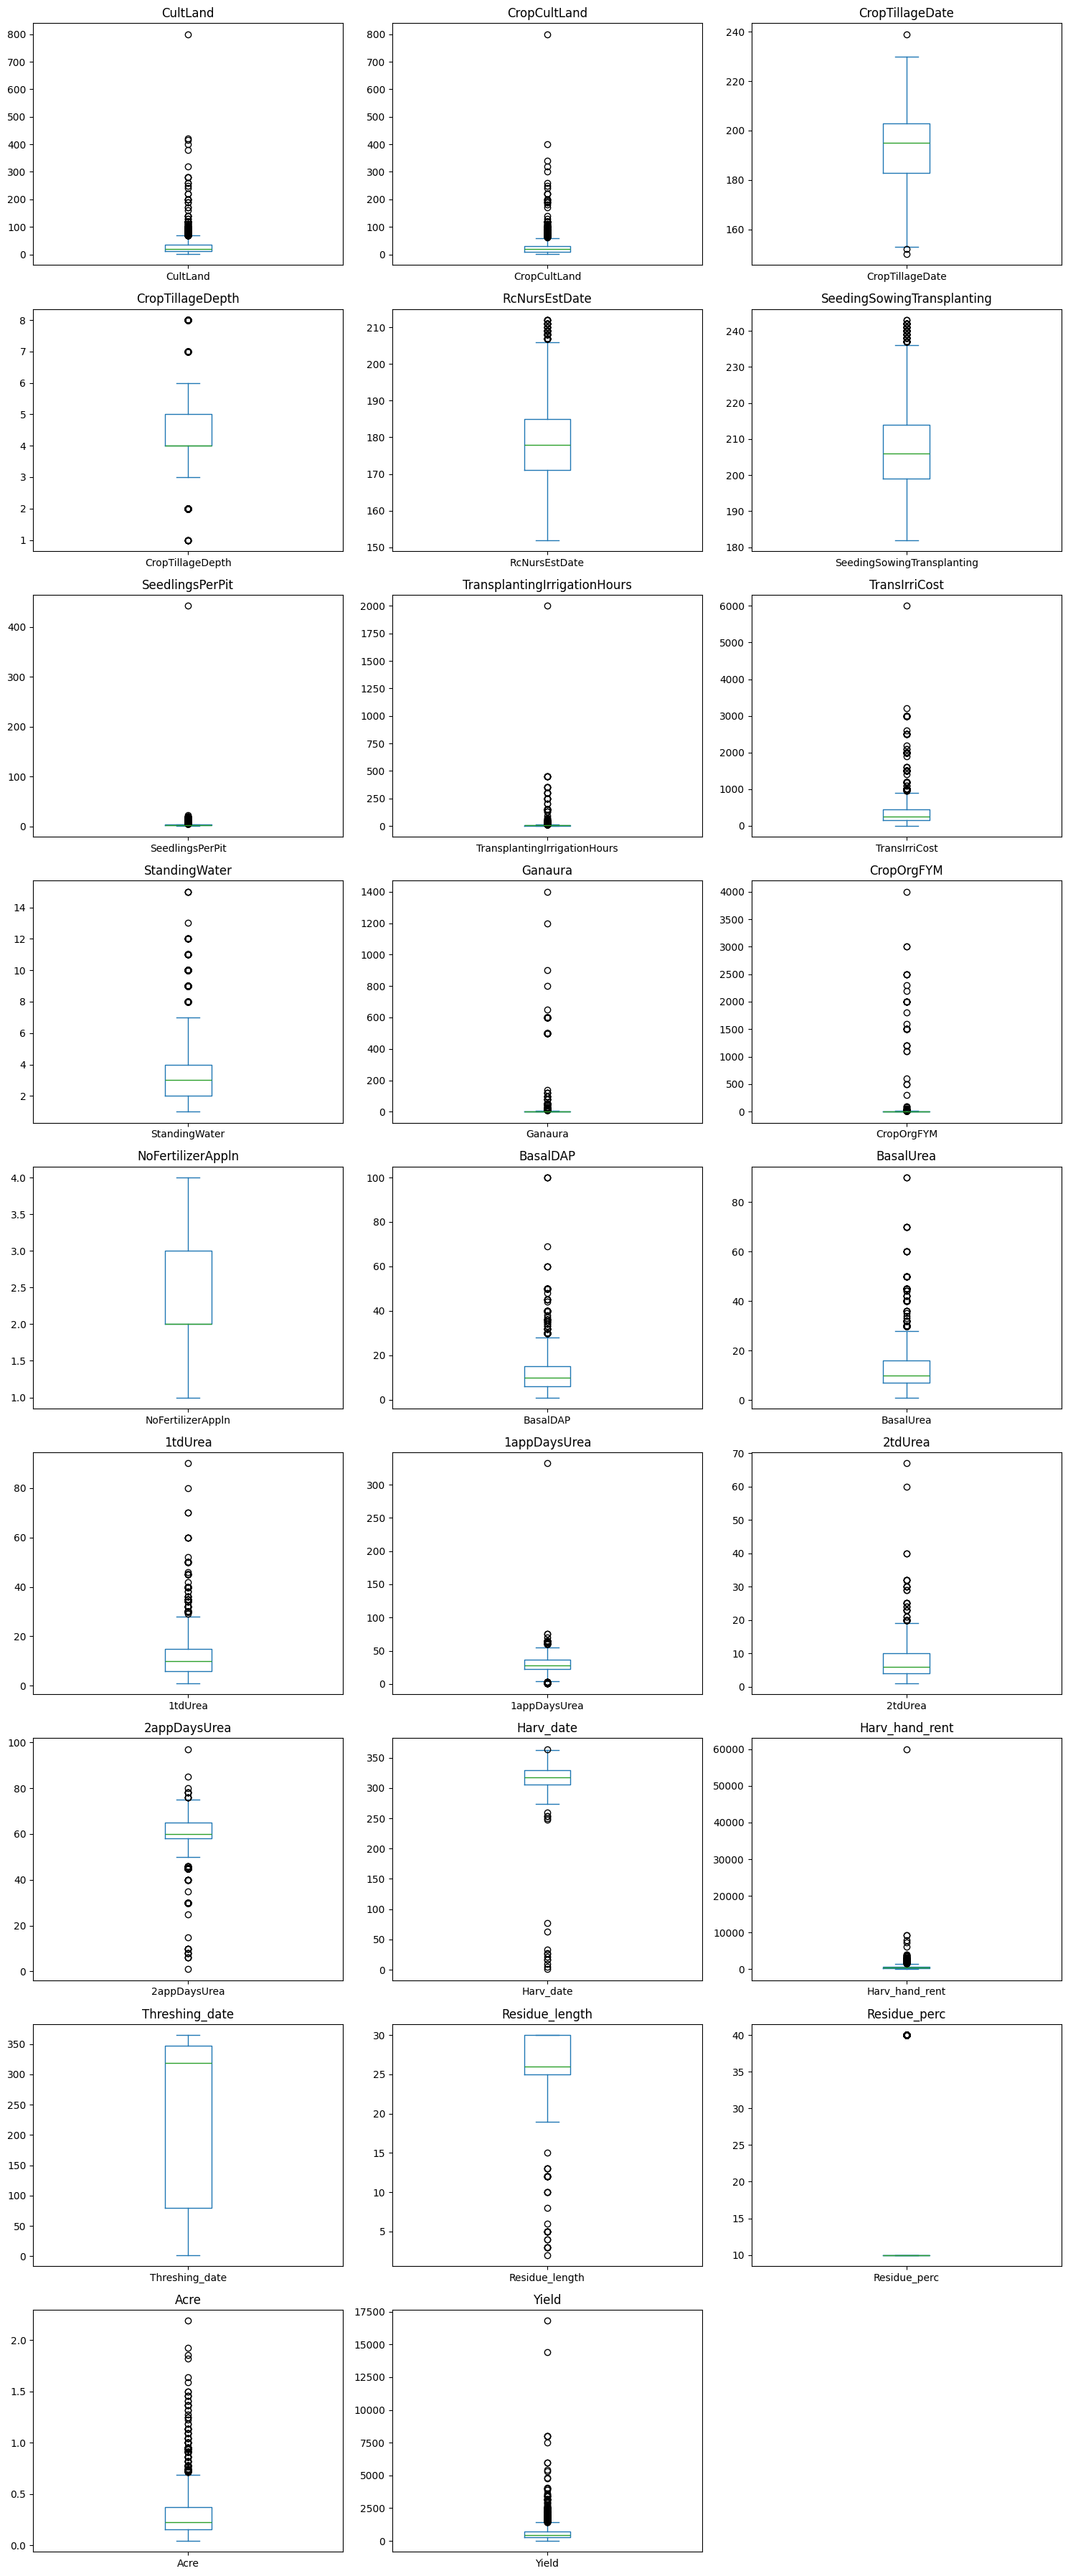

In [1240]:
# Numerical variables : Visualization with boxplots

# Define the layout of your subplots
n_cols = 3  # number of columns per row in the subplot grid
n_rows = (len(train_num.columns) + n_cols - 1) // n_cols  # calculate the number of rows needed

# Create a large figure to hold all the subplots
plt.figure(figsize=(15, 4 * n_rows))  # Adjust the size as needed

# Create a box plot for each column
for i, col in enumerate(train_num.columns):
    plt.subplot(n_rows, n_cols, i + 1)  # add a new subplot iteratively
    train_num[col].plot(kind='box')
    plt.title(col)

# Adjust layout and show the plot
plt.tight_layout()
#plt.show()




In [1241]:
# Numerical variables : Deal with NaN or 0 

# ARBITRARY : Replace with arbitrary value -999 because it is out of range and so it will be easy to identify later
train_num = train_num.fillna(-999)
test_num = test_num.fillna(-999)


# MEAN : Replace with MEDIAN value of each column in test also
#train_num = train_num.fillna(train_num.mean())
#test_num = test_num.fillna(test_num.mean())



#check the amount of nan in each column
train_num.isna().sum()



CultLand                        0
CropCultLand                    0
CropTillageDate                 0
CropTillageDepth                0
RcNursEstDate                   0
SeedingSowingTransplanting      0
SeedlingsPerPit                 0
TransplantingIrrigationHours    0
TransIrriCost                   0
StandingWater                   0
Ganaura                         0
CropOrgFYM                      0
NoFertilizerAppln               0
BasalDAP                        0
BasalUrea                       0
1tdUrea                         0
1appDaysUrea                    0
2tdUrea                         0
2appDaysUrea                    0
Harv_date                       0
Harv_hand_rent                  0
Threshing_date                  0
Residue_length                  0
Residue_perc                    0
Acre                            0
Yield                           0
dtype: int64

In [1242]:
# Numerical variables : Deal with outliers

#Create a copy of train_num
#Drop Yield column

train_num_out = train_num.copy()
#Drop Yield column in train_num_out
train_num_out = train_num_out.drop('Yield', axis=1)

# Cappin with Winsorizer on train_num_out, as train_cat2 doesn't have outliers
# Capping outliers to the 95th percentile
windsorizer = Winsorizer(capping_method='iqr', tail='both', fold=3)
windsorizer.fit(train_num_out)
train_num_out = windsorizer.transform(train_num_out)



# Visualize the results of the transformation
# Define the layout of your subplots
n_cols = 3  # number of columns per row in the subplot grid
n_rows = (len(train_num_out.columns) + n_cols - 1) // n_cols  # calculate the number of rows needed

# Create a large figure to hold all the subplots
plt.figure(figsize=(15, 4 * n_rows))  # Adjust the size as needed

# Create a box plot for each column
for i, col in enumerate(train_num_out.columns):
    plt.subplot(n_rows, n_cols, i + 1)  # add a new subplot iteratively
    train_num_out[col].plot(kind='box')
    plt.title(col)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



ValueError: Input columns ['Residue_perc'] have low variation for method 'iqr'. Try other capping methods or drop these columns.

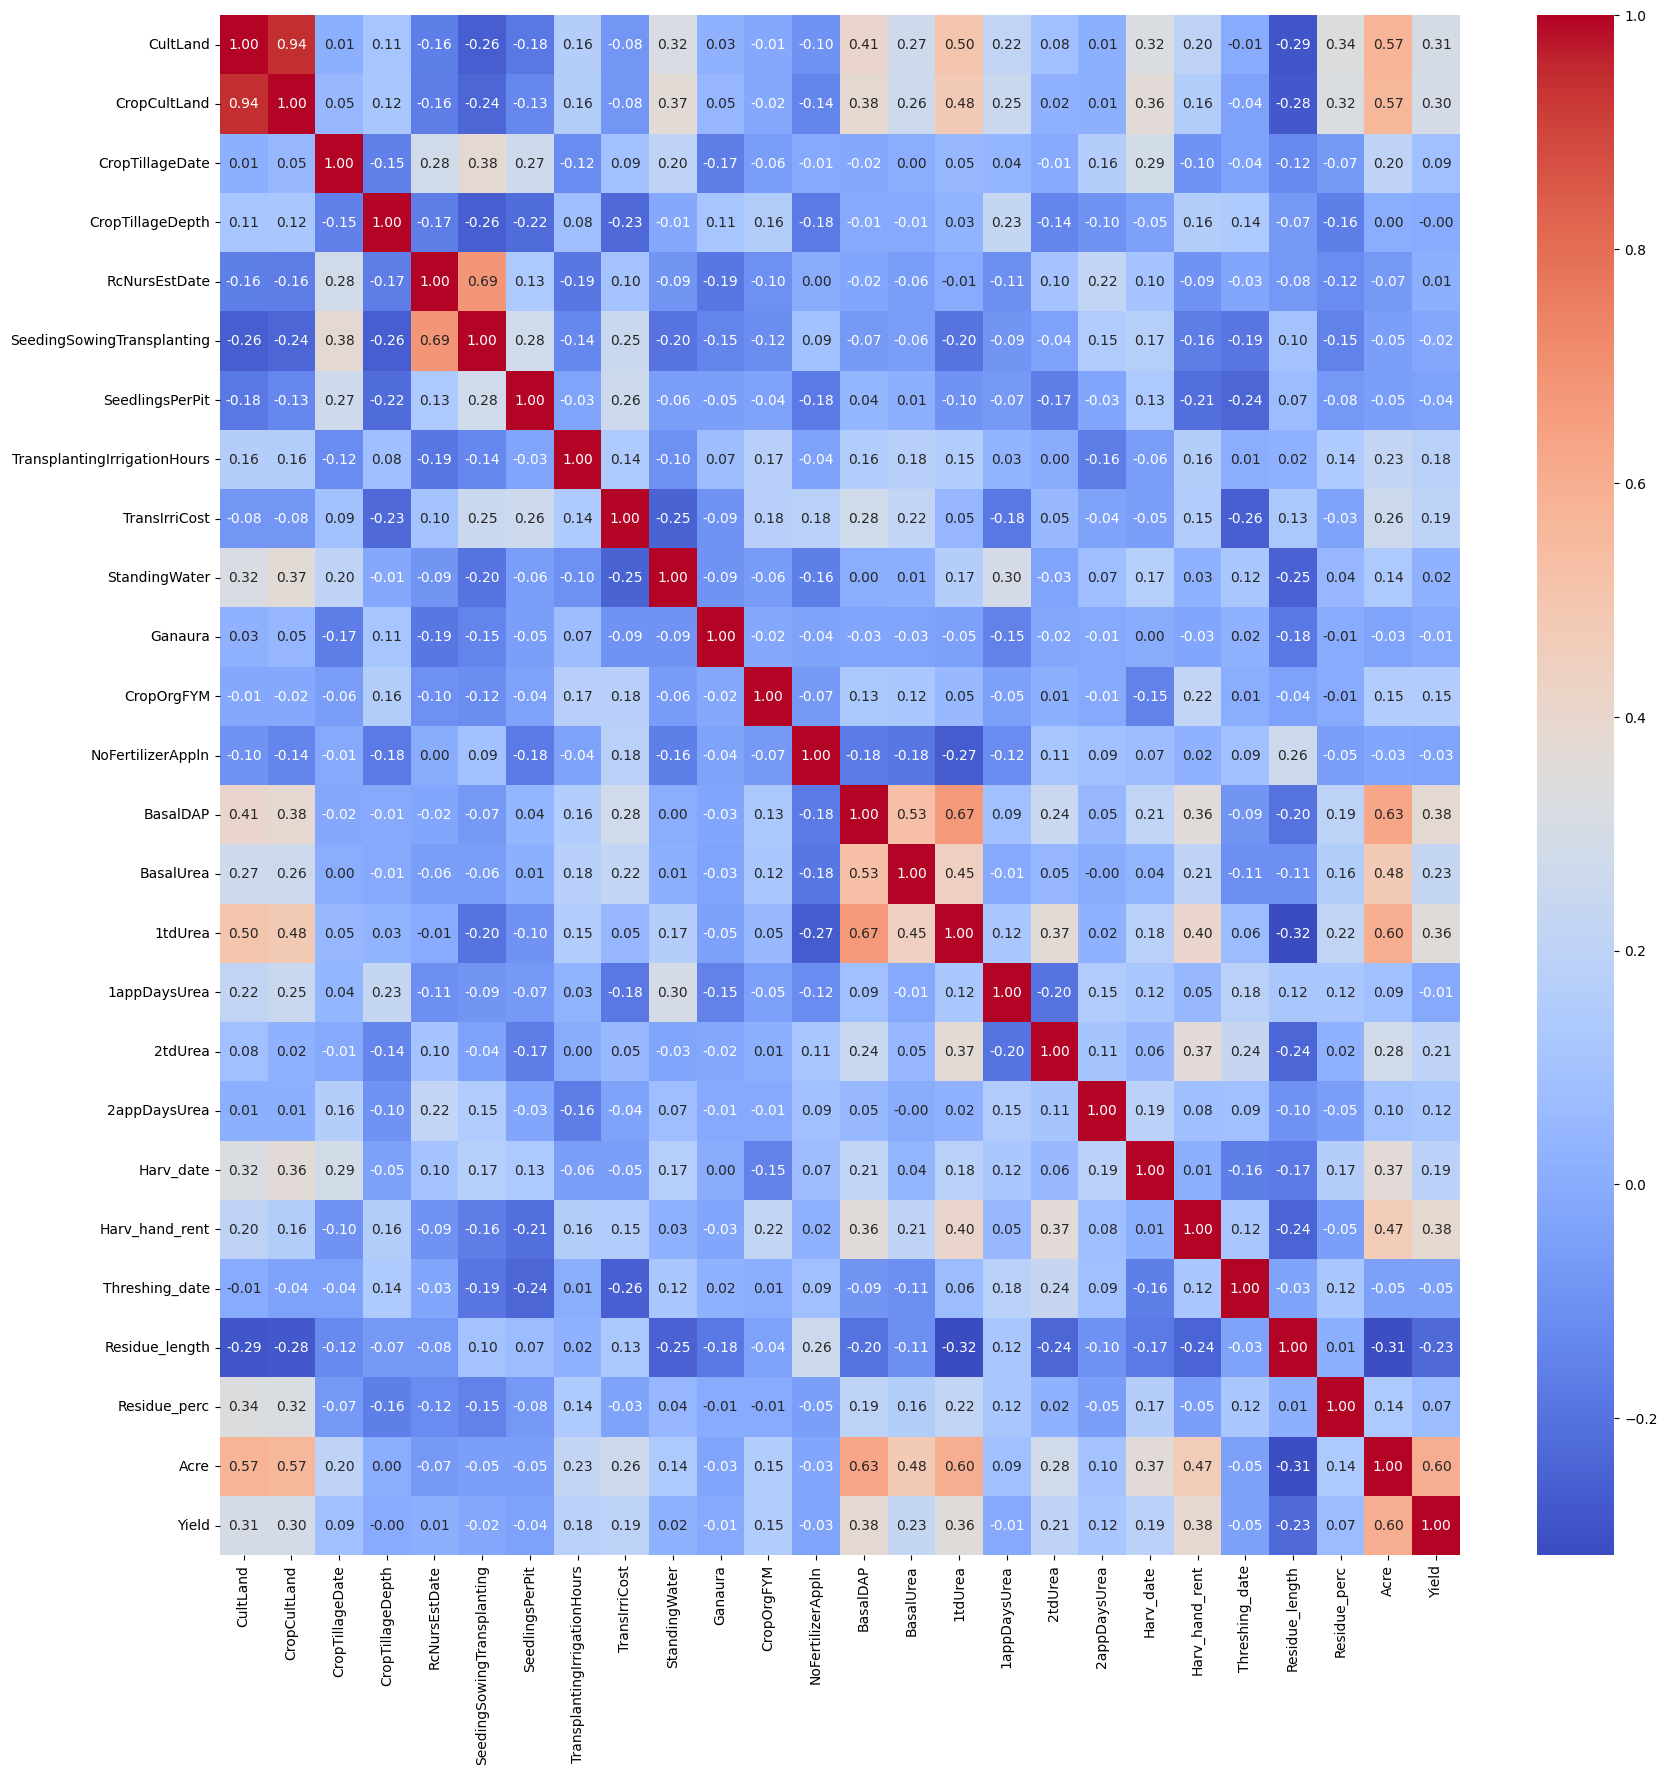

In [ ]:
# Numerical variables : Create a heatmap for feature selection

#Put the Yield column back
train_num_out = pd.concat([train_num_out, train_num['Yield']], axis=1)

# Create a heat map to visualize the correlation between the variables
plt.figure(figsize=(20, 20))
sns.heatmap(train_num_out.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


#select the columns with annot > 0.3 with Yield



In [ ]:
correlation_matrix = train_num_out.corr()

high_corr_features = correlation_matrix.index[abs(correlation_matrix["Yield"]) > 0.1]
high_corr_features = [feature for feature in high_corr_features if feature != 'Yield']

train_num_out = train_num_out[high_corr_features + ['Yield']]
test_num_out = test_num[high_corr_features]


In [ ]:
# Split data for training and local testing
test_num.head()

,CultLand,CropCultLand,CropTillageDate,CropTillageDepth,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,...,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_date,Harv_hand_rent,Threshing_date,Residue_length,Residue_perc,Acre
0,20,13,205,4,184.0,210,1.0,2.0,200.0,2.0,...,8.0,23.0,6.0,63.0,336,500.0,362,22,10,0.272727
1,25,25,205,5,189.0,214,4.0,2.0,300.0,3.0,...,7.0,23.0,8.0,65.0,316,150.0,354,28,10,0.227273
2,30,30,188,5,175.0,189,2.0,4.0,300.0,10.0,...,9.0,38.0,6.0,60.0,328,1200.0,339,28,10,0.281250
3,15,10,185,5,171.0,191,2.0,2.0,300.0,3.0,...,9.0,30.0,6.0,60.0,288,300.0,298,30,10,0.136364
4,30,10,202,3,175.0,203,1.0,6.0,400.0,3.0,...,15.0,40.0,6.0,60.0,324,400.0,324,26,40,0.312500


In [ ]:


#add train_cat2 to train_num and remove it from train_cat

test = test_num.copy()
train = train_num_out.copy()

X = train.drop(['Yield'], axis = 1)
#add back train_cat and train_num
X =X.select_dtypes(include=np.number)
y = train.Yield

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 1234, shuffle = True)

# Instantiate model
model = RandomForestRegressor(n_estimators=500, random_state = 1234, max_depth=14, min_samples_leaf =1, min_samples_split=2, max_features='sqrt' )

#param_grid = {
    #'max_depth': [10, 20, None],
    #'min_samples_split': [2, 10],
    #'min_samples_leaf': [1, 4],
    #'max_features': ['auto', 'sqrt']
#}

# Instantiate the grid search model
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
#grid_search.fit(X_train.fillna(0), y_train)

# Make predictions
#preds = grid_search.predict(X_test.fillna(0))
# Initial fit model
model.fit(X_train.fillna(0), y_train)
# Initial make predictions
preds = model.predict(X_test.fillna(0))

# Measure model performance
mean_squared_error(y_test, preds, squared=False)



356.13574692162337

In [ ]:
# Make predictions on the Zindi test set
#Concact the new test

#Put back ID columns on test
test = pd.concat([test, testm['ID']], axis=1)

test_df = test[X.columns]
preds = model.predict(test_df.fillna(0))

# Create submisiion file to be uploaded to Zindi for scoring
sub = pd.DataFrame({'ID': test.ID, 'Yield': preds})
sub.to_csv('BenchmarkSubmission.csv', index = False)

sub.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,670.904928
1,ID_SO3VW2X4QO93,411.572386
2,ID_UKUQ7JM8E894,602.496508
3,ID_QUISMWEZR2H4,291.549182
4,ID_25JGI455VKCZ,611.993273
